<a href="https://colab.research.google.com/github/Motihari09052005/DileeppersonalResume.github.io/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Test the model on the testing set
y_pred = grid_search.best_estimator_.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.9523809523809523
Test Accuracy: 1.0


In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for a clean output

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Logistic Regression classifier
lr = LogisticRegression()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solvers for optimization
    'max_iter': [100, 200, 300]  # Maximum number of iterations for the solver
}

# Setup the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           scoring='accuracy',  # We are optimizing for accuracy
                           cv=5,  # 5-fold cross-validation
                           verbose=2,  # Verbose output
                           n_jobs=-1)  # Utilize all CPUs

# Fit the model using cross-validation with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score from cross-validation
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

print(f"Best Parameters from GridSearchCV: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_cv_score:.4f}")

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the testing set
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Print classification report for more insights
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix as a DataFrame
conf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_matrix, index=data.target_names, columns=data.target_names)

print("\nConfusion Matrix:")
print(df_cm)

# Perform cross-validation using the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters from GridSearchCV: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validation Accuracy: 0.9810

Test Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      1.00      0.91        15
           2       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Confusion Matrix:
            setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          15          0
virginica        0           3         12

Cross-Validation Scores: [1.         0.95238095 1.         0.95238095 1.        ]
Mean Cross-Validation Score: 0.9810


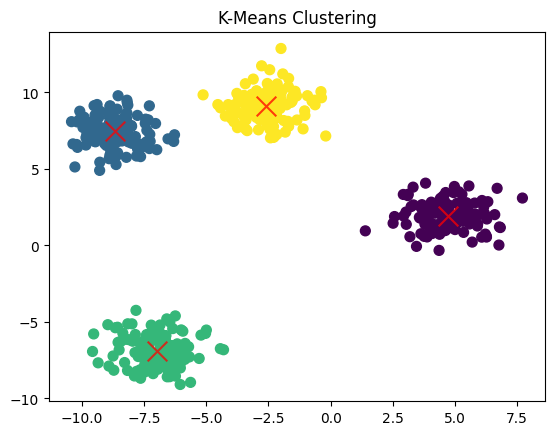

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("K-Means Clustering")
plt.show()


   CustomerID        Sales  Quantity  Frequency
0           1   811.626226        11         25
1           2  1906.357182        17         21
2           3  1490.788489         8         36
3           4  1237.451120         4         10
4           5   396.435417         6         37


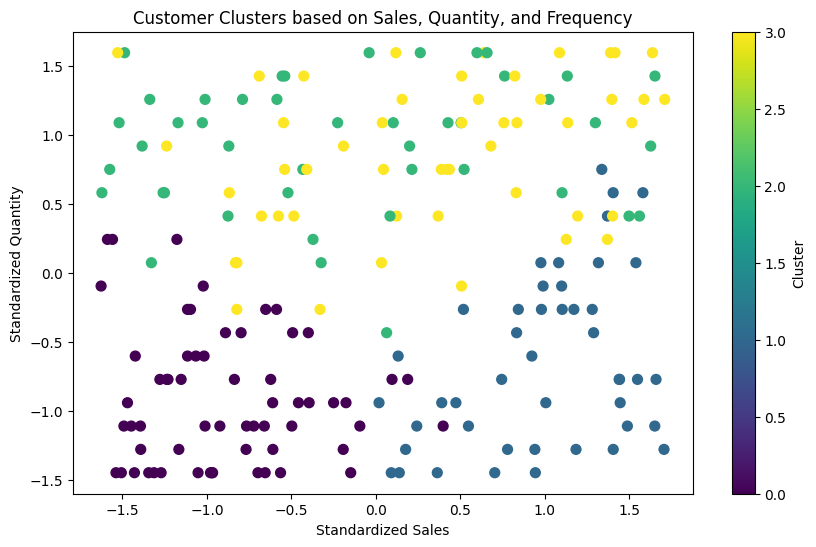

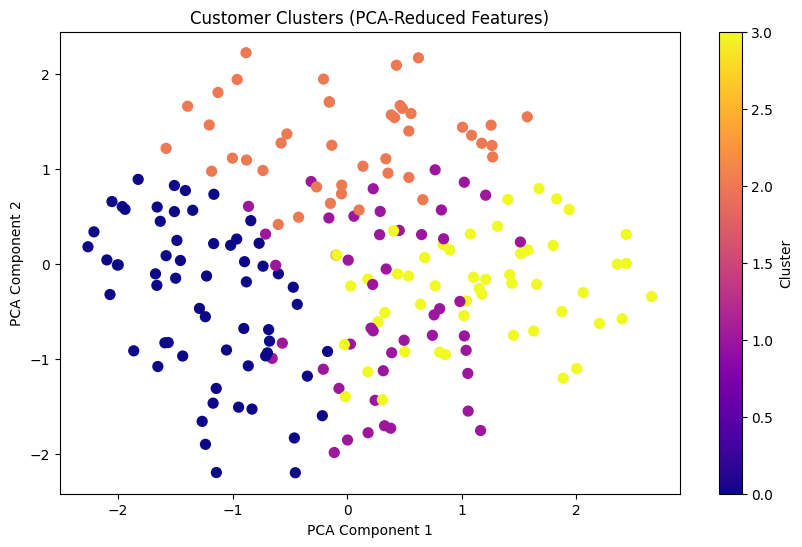


Cluster Summary:

  Cluster        Sales                             Quantity          \
                  mean          min          max       mean min max   
0       0   522.563174   110.492023  1242.118522   4.196721   1  11   
1       1  1569.769296  1029.960245  1972.735863   5.733333   1  14   
2       2   933.015220   113.209048  1942.828719  15.113636   7  19   
3       3  1207.074540   165.338190  1975.085180  14.700000   8  19   

   Frequency          
        mean min max  
0  29.016393   3  49  
1  23.622222   5  48  
2  38.045455  25  49  
3  11.740000   1  25  


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load or simulate Walmart dataset
# For demonstration purposes, we will create a dummy dataset with random values.
np.random.seed(42)
data = {
    'CustomerID': np.arange(1, 201),  # 200 customers
    'Sales': np.random.uniform(100, 2000, 200),  # Sales ranging from 100 to 2000
    'Quantity': np.random.randint(1, 20, 200),  # Quantity of products purchased
    'Frequency': np.random.randint(1, 50, 200)  # Number of transactions
}

# Create a DataFrame
walmart_df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(walmart_df.head())

# Features to be used for clustering
X = walmart_df[['Sales', 'Quantity', 'Frequency']]

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
walmart_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=walmart_df['Cluster'], cmap='viridis', s=50)
plt.title("Customer Clusters based on Sales, Quantity, and Frequency")
plt.xlabel("Standardized Sales")
plt.ylabel("Standardized Quantity")
plt.colorbar(label='Cluster')
plt.show()

# Optional: Apply PCA for 2D visualization (if working with many features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=walmart_df['Cluster'], cmap='plasma', s=50)
plt.title("Customer Clusters (PCA-Reduced Features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Display cluster statistics
cluster_summary = walmart_df.groupby('Cluster').agg({
    'Sales': ['mean', 'min', 'max'],
    'Quantity': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
}).reset_index()

print("\nCluster Summary:\n")
print(cluster_summary)


   CustomerID  Year    TotalSales  TotalTransactions  AvgBasketSize  Recency
0           1  2000   7553.348365                 93      81.218800      270
1           2  2000  14666.679442                 61     240.437368       20
2           3  2000   3204.770945                 83      38.611698      214
3           4  2000   1255.863882                 88      14.271180       99
4           5  2000   2943.049677                  3     981.016559      149
K-Means Silhouette Score: 0.2057
DBSCAN Silhouette Score: -0.3113


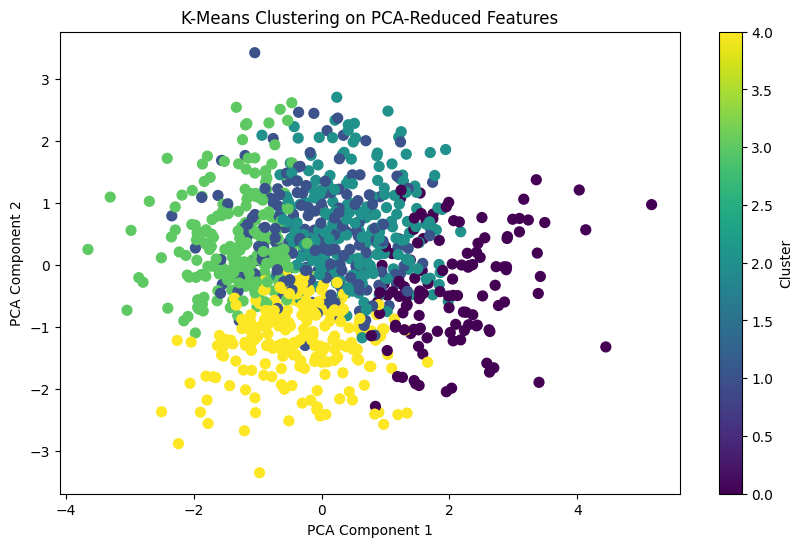

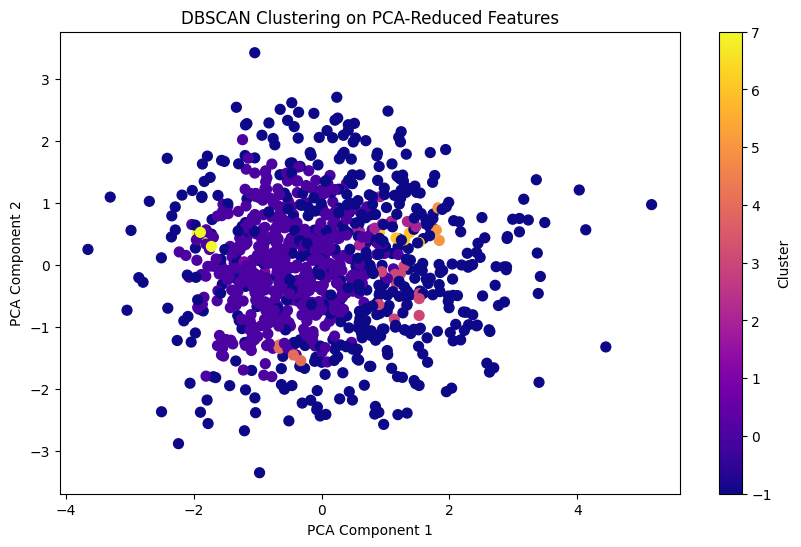


K-Means Cluster Summary:

  KMeans_Cluster     TotalSales                                \
                           mean            min            max   
0              0  218153.583332  140293.894788  280990.566322   
1              1  237798.224713  206423.937149  305684.234869   
2              2  215942.014761  152154.015520  273137.269928   
3              3  197896.990779  138210.196135  249465.845900   
4              4  188017.374053  130864.048839  225256.627222   

  TotalTransactions             AvgBasketSize                           \
               mean   min   max          mean         min          max   
0        938.080000   626  1238   1117.819103  658.719215  2177.230949   
1       1091.048780   837  1421    474.951188  220.529010   883.151001   
2        975.620690   711  1167    527.493218  239.255500  1038.280131   
3       1196.454106  1047  1529    333.178819  139.316731   922.906972   
4       1002.004329   706  1238    423.476222  135.151698   955.070862   

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Simulating a Walmart dataset for 20 years with complex features
np.random.seed(42)

# Simulate 20 years of customer data
years = np.arange(2000, 2021)
n_customers = 1000  # Assume we have 1000 customers
data = []

for year in years:
    for customer_id in range(1, n_customers + 1):
        total_sales = np.random.uniform(100, 20000)  # Total sales in a year
        total_transactions = np.random.randint(1, 100)  # Number of transactions
        avg_basket_size = total_sales / total_transactions if total_transactions != 0 else 0
        recency = np.random.randint(0, 365)  # Days since the last purchase

        data.append([customer_id, year, total_sales, total_transactions, avg_basket_size, recency])

# Convert to DataFrame
walmart_df = pd.DataFrame(data, columns=['CustomerID', 'Year', 'TotalSales', 'TotalTransactions', 'AvgBasketSize', 'Recency'])

# Display the first few rows
print(walmart_df.head())

# Feature Engineering: Create a pivot table to aggregate data across the years for each customer
customer_summary = walmart_df.groupby('CustomerID').agg({
    'TotalSales': 'sum',  # Sum total sales over the 20 years
    'TotalTransactions': 'sum',  # Sum transactions over 20 years
    'AvgBasketSize': 'mean',  # Average basket size over 20 years
    'Recency': 'mean'  # Average recency over 20 years
}).reset_index()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_summary[['TotalSales', 'TotalTransactions', 'AvgBasketSize', 'Recency']])

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_summary['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_summary['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Calculate silhouette scores to evaluate clustering performance
kmeans_silhouette = silhouette_score(X_scaled, customer_summary['KMeans_Cluster'])
dbscan_silhouette = silhouette_score(X_scaled, customer_summary['DBSCAN_Cluster'])

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

# Visualize the clusters from K-Means (PCA Reduced Features)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_summary['KMeans_Cluster'], cmap='viridis', s=50)
plt.title("K-Means Clustering on PCA-Reduced Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Visualize the clusters from DBSCAN (PCA Reduced Features)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_summary['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.title("DBSCAN Clustering on PCA-Reduced Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Cluster Summary for deeper insights
cluster_summary = customer_summary.groupby('KMeans_Cluster').agg({
    'TotalSales': ['mean', 'min', 'max'],
    'TotalTransactions': ['mean', 'min', 'max'],
    'AvgBasketSize': ['mean', 'min', 'max'],
    'Recency': ['mean', 'min', 'max']
}).reset_index()

print("\nK-Means Cluster Summary:\n")
print(cluster_summary)


   CustomerID    TotalSales  TotalTransactions  AvgBasketSize  Recency
0           1   7553.348365                 47     186.834332      120
1           2  19019.214698                 12     339.157628      175
2           3  14666.679442                 62     401.815981       23
3           4  12013.303836                 80     465.045353      213
4           5   3204.770945                 88     132.628199      235

Cluster distribution:
 DBSCAN_Cluster
-1     669
 0      32
 13     19
 15     14
 27     12
 6      11
 23     11
 21     11
 18     11
 4      10
 2       9
 1       8
 19      8
 31      8
 25      7
 24      7
 9       7
 26      7
 11      6
 7       6
 38      6
 35      6
 17      6
 22      6
 12      6
 14      5
 36      5
 43      5
 41      5
 34      5
 40      5
 16      5
 5       5
 32      5
 42      5
 3       5
 37      5
 20      5
 10      5
 39      5
 8       5
 30      5
 29      4
 33      4
 28      4
Name: count, dtype: int64


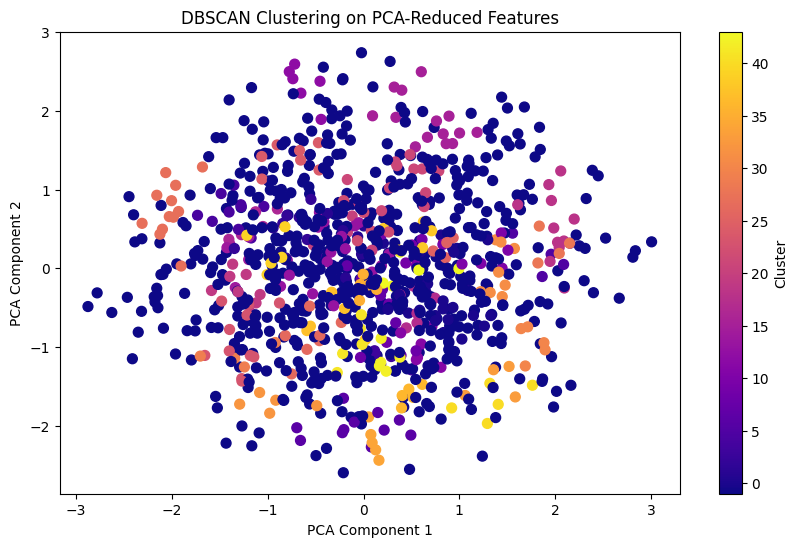


Cluster Summary:

   DBSCAN_Cluster    TotalSales                             TotalTransactions  \
                           mean           min           max              mean   
0              -1   9744.488212    200.725519  19994.381698         48.784753   
1               0  12127.549446   9304.440851  15901.101266         79.687500   
2               1  11146.533004   9327.598258  13027.694691         55.625000   
3               2  16233.027838  13868.714434  19009.723341         21.222222   
4               3   3051.630841   1896.766424   4277.121303         30.600000   
5               4  11870.924651  10689.058357  12784.855040         12.900000   
6               5  15061.826459  13483.117276  17228.538607         64.400000   
7               6   3277.947594    767.295451   5377.527117         84.181818   
8               7   5421.388596   3300.080223   7311.638592         40.500000   
9               8   4864.552679   3589.888445   6526.833812         69.800000   
10       

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Simulate Walmart dataset for customers
np.random.seed(42)

# Generate a sample dataset for Walmart customers with complex features
n_customers = 1000  # Let's assume we have 1000 customers
data = {
    'CustomerID': np.arange(1, n_customers + 1),
    'TotalSales': np.random.uniform(100, 20000, n_customers),  # Total sales in last year
    'TotalTransactions': np.random.randint(1, 100, n_customers),  # Number of transactions
    'AvgBasketSize': np.random.uniform(20, 500, n_customers),  # Average basket size
    'Recency': np.random.randint(1, 365, n_customers),  # Days since last purchase
}

# Create DataFrame
walmart_df = pd.DataFrame(data)

# Display first few rows of the dataset
print(walmart_df.head())

# Features to be used for clustering
X = walmart_df[['TotalSales', 'TotalTransactions', 'AvgBasketSize', 'Recency']]

# Standardize the features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples are key parameters to tune
walmart_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Get the unique clusters and counts
unique_clusters = walmart_df['DBSCAN_Cluster'].value_counts()
print("\nCluster distribution:\n", unique_clusters)

# Evaluate clustering performance using Silhouette score (only if we have more than one cluster)
if len(unique_clusters) > 1 and -1 not in unique_clusters:
    silhouette_avg = silhouette_score(X_scaled, walmart_df['DBSCAN_Cluster'])
    print(f"\nSilhouette Score: {silhouette_avg:.4f}")

# Dimensionality Reduction with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=walmart_df['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.title("DBSCAN Clustering on PCA-Reduced Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Analyze the cluster characteristics
cluster_summary = walmart_df.groupby('DBSCAN_Cluster').agg({
    'TotalSales': ['mean', 'min', 'max'],
    'TotalTransactions': ['mean', 'min', 'max'],
    'AvgBasketSize': ['mean', 'min', 'max'],
    'Recency': ['mean', 'min', 'max'],
}).reset_index()

print("\nCluster Summary:\n")
print(cluster_summary)


   CustomerID    TotalSales  TotalTransactions  AvgBasketSize  Recency
0           1   7553.348365                 47     186.834332      120
1           2  19019.214698                 12     339.157628      175
2           3  14666.679442                 62     401.815981       23
3           4  12013.303836                 80     465.045353      213
4           5   3204.770945                 88     132.628199      235

Cluster distribution:
 DBSCAN_Cluster
-1     669
 0      32
 13     19
 15     14
 27     12
 6      11
 23     11
 21     11
 18     11
 4      10
 2       9
 1       8
 19      8
 31      8
 25      7
 24      7
 9       7
 26      7
 11      6
 7       6
 38      6
 35      6
 17      6
 22      6
 12      6
 14      5
 36      5
 43      5
 41      5
 34      5
 40      5
 16      5
 5       5
 32      5
 42      5
 3       5
 37      5
 20      5
 10      5
 39      5
 8       5
 30      5
 29      4
 33      4
 28      4
Name: count, dtype: int64


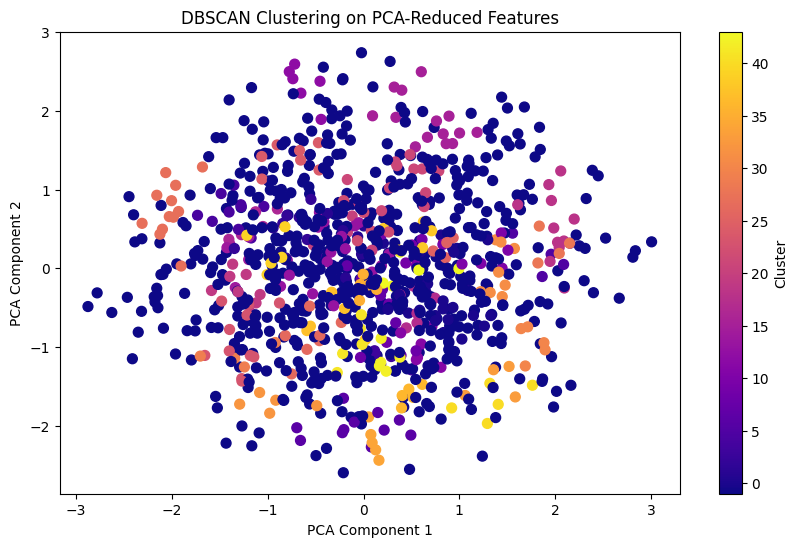


Cluster Summary:

   DBSCAN_Cluster    TotalSales                             TotalTransactions  \
                           mean           min           max              mean   
0              -1   9744.488212    200.725519  19994.381698         48.784753   
1               0  12127.549446   9304.440851  15901.101266         79.687500   
2               1  11146.533004   9327.598258  13027.694691         55.625000   
3               2  16233.027838  13868.714434  19009.723341         21.222222   
4               3   3051.630841   1896.766424   4277.121303         30.600000   
5               4  11870.924651  10689.058357  12784.855040         12.900000   
6               5  15061.826459  13483.117276  17228.538607         64.400000   
7               6   3277.947594    767.295451   5377.527117         84.181818   
8               7   5421.388596   3300.080223   7311.638592         40.500000   
9               8   4864.552679   3589.888445   6526.833812         69.800000   
10       

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Simulate Walmart dataset for customers
np.random.seed(42)

# Generate a sample dataset for Walmart customers with complex features
n_customers = 1000  # Let's assume we have 1000 customers
data = {
    'CustomerID': np.arange(1, n_customers + 1),
    'TotalSales': np.random.uniform(100, 20000, n_customers),  # Total sales in last year
    'TotalTransactions': np.random.randint(1, 100, n_customers),  # Number of transactions
    'AvgBasketSize': np.random.uniform(20, 500, n_customers),  # Average basket size
    'Recency': np.random.randint(1, 365, n_customers),  # Days since last purchase
}

# Create DataFrame
walmart_df = pd.DataFrame(data)

# Display first few rows of the dataset
print(walmart_df.head())

# Features to be used for clustering
X = walmart_df[['TotalSales', 'TotalTransactions', 'AvgBasketSize', 'Recency']]

# Standardize the features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples are key parameters to tune
walmart_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Get the unique clusters and counts
unique_clusters = walmart_df['DBSCAN_Cluster'].value_counts()
print("\nCluster distribution:\n", unique_clusters)

# Evaluate clustering performance using Silhouette score (only if we have more than one cluster)
if len(unique_clusters) > 1 and -1 not in unique_clusters:
    silhouette_avg = silhouette_score(X_scaled, walmart_df['DBSCAN_Cluster'])
    print(f"\nSilhouette Score: {silhouette_avg:.4f}")

# Dimensionality Reduction with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
walmart_df['PCA_1'] = X_pca[:, 0]
walmart_df['PCA_2'] = X_pca[:, 1]

# Plot DBSCAN clusters using Plotly for an interactive experience
fig = px.scatter(walmart_df, x='PCA_1', y='PCA_2', color='DBSCAN_Cluster',
                 title="DBSCAN Clustering on Walmart Dataset (PCA-Reduced)",
                 labels={'PCA_1': 'PCA Component 1', 'PCA_2': 'PCA Component 2'},
                 hover_data=['TotalSales', 'TotalTransactions', 'AvgBasketSize', 'Recency'])

fig.update_traces(marker=dict(size=7), selector=dict(mode='markers'))
fig.update_layout(legend_title_text='Cluster')
fig.show()

# Optional: Static visualization using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(walmart_df['PCA_1'], walmart_df['PCA_2'], c=walmart_df['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.title("DBSCAN Clustering on PCA-Reduced Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Analyze the cluster characteristics
cluster_summary = walmart_df.groupby('DBSCAN_Cluster').agg({
    'TotalSales': ['mean', 'min', 'max'],
    'TotalTransactions': ['mean', 'min', 'max'],
    'AvgBasketSize': ['mean', 'min', 'max'],
    'Recency': ['mean', 'min', 'max'],
}).reset_index()

print("\nCluster Summary:\n")
print(cluster_summary)


     Region  PopulationDensity  GDPperCapita  AgeUnder25  AgeAbove60  \
0  Region_1       18789.551930   7132.536283   27.405317   17.977045   
1  Region_2       47540.643890   5592.915480   41.676038   16.979547   
2  Region_3       36626.497696   3440.512355   54.917833    5.641052   
3  Region_4       29973.058361   8231.052687   49.288995   13.531196   
4  Region_5        7885.330158   7004.946139   52.262446   14.504890   

   LiteracyRate  UrbanizationRate  LifeExpectancy  
0     63.085284         69.651135       76.817575  
1     62.348940         65.871668       79.917035  
2     95.312729         54.411737       66.261697  
3     62.477310         77.362829       75.621852  
4     63.597486         32.028471       74.293650  
K-Means Silhouette Score: 0.1106


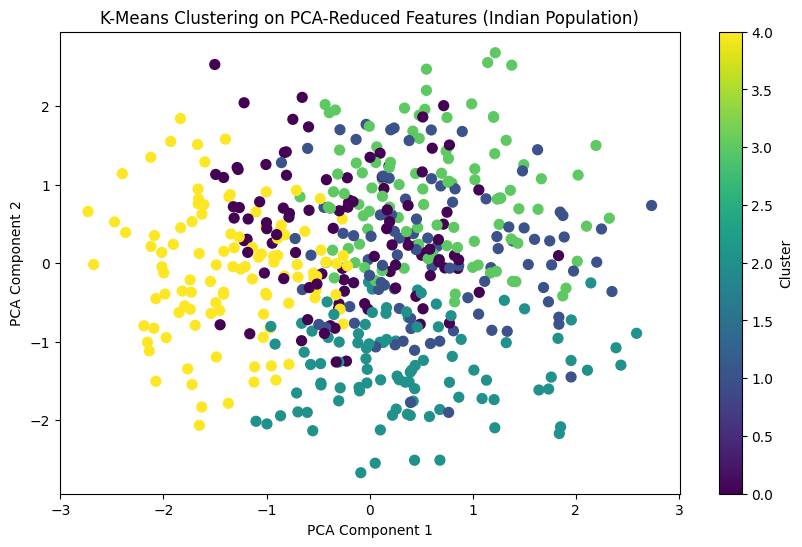


Cluster Summary (K-Means):

  KMeans_Cluster PopulationDensity                             GDPperCapita  \
                              mean           min           max         mean   
0              0      10470.677512    558.932876  30517.260266  4966.777967   
1              1      20559.758310    446.911314  49345.658136  3798.077118   
2              2      31053.884562    706.508287  49526.206586  7049.407557   
3              3      24554.142924    352.573034  48653.226682  4901.356833   
4              4      37517.266321  14120.063161  49648.943326  4668.806119   

                            AgeUnder25                        ... AgeAbove60  \
           min          max       mean        min        max  ...        max   
0   672.046746  9997.317896  50.688430  37.750009  59.884980  ...  29.812088   
1   544.004219  9329.071897  27.639002  20.197599  40.507540  ...  29.958688   
2  1262.220584  9970.305393  42.617386  21.480305  59.506720  ...  29.908358   
3   604.460372  9

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Simulate a dataset representing Indian population features
np.random.seed(42)

n_regions = 500  #  500 regions in India

# Generate demographic and economic data for 2024 (hypothetical dataset)
data = {
    'Region': [f'Region_{i}' for i in range(1, n_regions + 1)],
    'PopulationDensity': np.random.uniform(100, 50000, n_regions),  # People per square km
    'GDPperCapita': np.random.uniform(500, 10000, n_regions),  # GDP per capita in USD
    'AgeUnder25': np.random.uniform(20, 60, n_regions),  # Percentage of population under 25
    'AgeAbove60': np.random.uniform(5, 30, n_regions),  # Percentage of population above 60
    'LiteracyRate': np.random.uniform(50, 100, n_regions),  # Literacy rate as a percentage
    'UrbanizationRate': np.random.uniform(20, 80, n_regions),  # Percentage living in urban areas
    'LifeExpectancy': np.random.uniform(60, 85, n_regions),  # Life expectancy in years
}

# Convert the data into a pandas DataFrame
india_population_df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(india_population_df.head())

# Select features for clustering
X = india_population_df[['PopulationDensity', 'GDPperCapita', 'AgeUnder25', 'AgeAbove60',
                         'LiteracyRate', 'UrbanizationRate', 'LifeExpectancy']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA and t-SNE for advanced visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
india_population_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
india_population_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, india_population_df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# Interactive Plot: K-Means Clustering with PCA
fig_kmeans_pca = px.scatter(india_population_df, x=X_pca[:, 0], y=X_pca[:, 1],
                            color='KMeans_Cluster', hover_data=['Region'],
                            title='K-Means Clustering on Indian Population (PCA Reduced)',
                            labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'})
fig_kmeans_pca.update_traces(marker=dict(size=8))
fig_kmeans_pca.show()

# Interactive Plot: DBSCAN Clustering with PCA
fig_dbscan_pca = px.scatter(india_population_df, x=X_pca[:, 0], y=X_pca[:, 1],
                            color='DBSCAN_Cluster', hover_data=['Region'],
                            title='DBSCAN Clustering on Indian Population (PCA Reduced)',
                            labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'})
fig_dbscan_pca.update_traces(marker=dict(size=8))
fig_dbscan_pca.show()

# t-SNE Visualization for High-Dimensional Data Visualization (K-Means Clusters)
fig_tsne = px.scatter(india_population_df, x=X_tsne[:, 0], y=X_tsne[:, 1],
                      color='KMeans_Cluster', hover_data=['Region'],
                      title='K-Means Clustering on Indian Population (t-SNE Reduced)',
                      labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'})
fig_tsne.update_traces(marker=dict(size=8))
fig_tsne.show()

# Optional: Static plot using matplotlib for PCA-reduced data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=india_population_df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title("K-Means Clustering on PCA-Reduced Features (Indian Population)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Cluster Summary: Analyze the characteristics of clusters formed by K-Means
cluster_summary = india_population_df.groupby('KMeans_Cluster').agg({
    'PopulationDensity': ['mean', 'min', 'max'],
    'GDPperCapita': ['mean', 'min', 'max'],
    'AgeUnder25': ['mean', 'min', 'max'],
    'AgeAbove60': ['mean', 'min', 'max'],
    'LiteracyRate': ['mean', 'min', 'max'],
    'UrbanizationRate': ['mean', 'min', 'max'],
    'LifeExpectancy': ['mean', 'min', 'max']
}).reset_index()

print("\nCluster Summary (K-Means):\n")
print(cluster_summary)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Simulate a dataset representing world population features
np.random.seed(42)

# Assume we have data for 195 countries
n_countries = 195

# Generate demographic and economic data for 2024 (hypothetical dataset)
data = {
    'Country': [f'Country_{i}' for i in range(1, n_countries + 1)],
    'PopulationSize': np.random.randint(50000, 1400000000, n_countries),  # Total population
    'GDPperCapita': np.random.uniform(1000, 80000, n_countries),  # GDP per capita in USD
    'UrbanPopulation': np.random.uniform(30, 100, n_countries),  # Percentage of urban population
    'LiteracyRate': np.random.uniform(50, 100, n_countries),  # Literacy rate as a percentage
    'LifeExpectancy': np.random.uniform(50, 85, n_countries),  # Life expectancy in years
    'AgeUnder25': np.random.uniform(20, 50, n_countries),  # Percentage of population under 25
    'AgeAbove65': np.random.uniform(5, 30, n_countries),  # Percentage of population above 65
}

# Convert the data into a pandas DataFrame
world_population_df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(world_population_df.head())

# Select features for clustering
X = world_population_df[['PopulationSize', 'GDPperCapita', 'UrbanPopulation',
                         'LiteracyRate', 'LifeExpectancy', 'AgeUnder25', 'AgeAbove65']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
world_population_df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
world_population_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, world_population_df['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# Interactive Plot: K-Means Clustering with PCA
fig_kmeans = px.scatter(world_population_df, x=X_pca[:, 0], y=X_pca[:, 1],
                        color='KMeans_Cluster', hover_data=['Country'],
                        title='K-Means Clustering on World Population (PCA Reduced)',
                        labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'})
fig_kmeans.update_traces(marker=dict(size=10))
fig_kmeans.show()

# Interactive Plot: DBSCAN Clustering with PCA
fig_dbscan = px.scatter(world_population_df, x=X_pca[:, 0], y=X_pca[:, 1],
                        color='DBSCAN_Cluster', hover_data=['Country'],
                        title='DBSCAN Clustering on World Population (PCA Reduced)',
                        labels={'x': 'PCA Component 1', 'y': 'PCA Component 2'})
fig_dbscan.update_traces(marker=dict(size=10))
fig_dbscan.show()

# Cluster Summary: Analyze the characteristics of clusters formed by K-Means
cluster_summary = world_population_df.groupby('KMeans_Cluster').agg({
    'PopulationSize': ['mean', 'min', 'max'],
    'GDPperCapita': ['mean', 'min', 'max'],
    'UrbanPopulation': ['mean', 'min', 'max'],
    'LiteracyRate': ['mean', 'min', 'max'],
    'LifeExpectancy': ['mean', 'min', 'max'],
    'AgeUnder25': ['mean', 'min', 'max'],
    'AgeAbove65': ['mean', 'min', 'max'],
}).reset_index()

print("\nCluster Summary (K-Means):\n")
print(cluster_summary)


     Country  PopulationSize  GDPperCapita  UrbanPopulation  LiteracyRate  \
0  Country_1      1273692419  24769.386476        63.192168     77.771585   
1  Country_2       787896414  23502.399056        36.848391     88.449371   
2  Country_3       996456378   3914.068841        64.413111     97.238286   
3  Country_4      1201313687  49155.582384        63.143024     92.482370   
4  Country_5       423784972  40711.642835        42.124131     62.367405   

   LifeExpectancy  AgeUnder25  AgeAbove65  
0       57.056956   43.995658   11.640001  
1       55.727958   32.756405    8.237873  
2       55.749303   20.674079   27.218702  
3       78.510115   28.060321   28.891287  
4       73.281903   36.249026   26.553190  
K-Means Silhouette Score: 0.1142



Cluster Summary (K-Means):

  KMeans_Cluster PopulationSize                         GDPperCapita  \
                           mean        min         max          mean   
0              0   1.126257e+09  709866108  1397333111  38389.682623   
1              1   6.601279e+08   88459749  1297976158  48975.133819   
2              2   8.213048e+08   30399564  1393101263  22557.424002   
3              3   4.481744e+08    2285000  1120113232  46812.147292   
4              4   4.791074e+08    3394769  1260572119  45029.695759   

                             UrbanPopulation                        ...  \
           min           max            mean        min        max  ...   
0  1726.567078  76360.357583       57.286213  33.946285  97.352078  ...   
1  5082.855972  77867.833825       82.750276  36.384427  99.507536  ...   
2  1399.865124  56588.970891       81.066249  53.006518  99.764579  ...   
3  8132.891834  78866.385875       76.987714  31.845688  99.980237  ...   
4  2137.085602  

# GRID SEARCH CV CODE

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
knn = KNeighborsClassifier()

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Best Parameters:", best_params)
print("Test Set Accuracy:", accuracy)


Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Test Set Accuracy: 1.0


Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Test Set Accuracy: 1.0


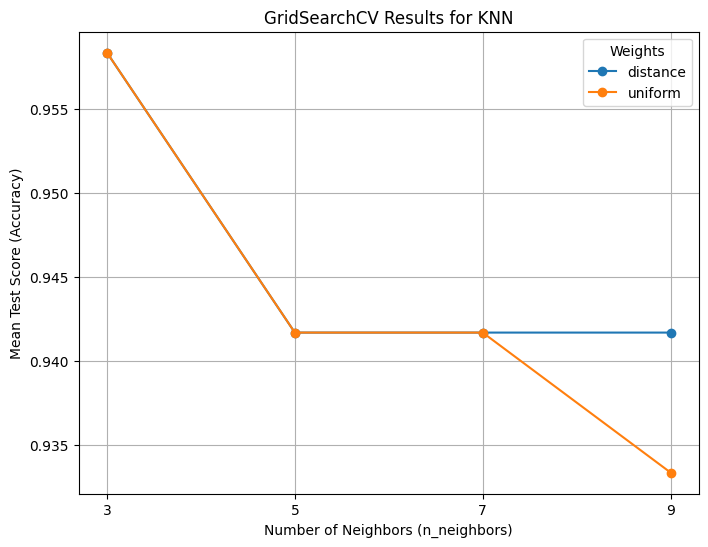

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
knn = KNeighborsClassifier()

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test set
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Best Parameters:", best_params)
print("Test Set Accuracy:", accuracy)

# Visualization of GridSearchCV results
results = grid_search.cv_results_

# Extract mean test scores
mean_scores = results['mean_test_score']
params = results['params']

# Create a DataFrame for better handling
results_df = pd.DataFrame(params)
results_df['mean_test_score'] = mean_scores

# Pivot the DataFrame for easier plotting
pivot_df = results_df.pivot(index='n_neighbors', columns='weights', values='mean_test_score')

# Plot the results
plt.figure(figsize=(8, 6))
for weight in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[weight], marker='o', label=weight)

plt.title('GridSearchCV Results for KNN')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.xticks(pivot_df.index)
plt.legend(title='Weights')
plt.grid()
plt.show()


# Hyper-pyrameter tuning using GridSearchCV

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data['Gender'].replace({'Male':0, 'Female':1},inplace=True)

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [ ]:
X=data.iloc[:,1:4].values
y=data.iloc[:,-1].values


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X=scaler.fit_transform(X)
X

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,y_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()